# Introduction

The palmerpenguins dataset contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The data were imported directly from the Environmental Data Initiative (EDI) Data Portal, and are available for use by CC0 license (“No Rights Reserved”) in accordance with the Palmer Station Data Policy.

We will use this dataset in classification setting to predict the penguins’ species from anatomical information.

![title](images/lter_penguins.png)

# Setup

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl

# Data Loading

In [2]:
# Loading the dataset from the local file.

DATASET_PATH = './data/penguins_size.csv'
dataset = pd.read_csv(DATASET_PATH)

# Data Analysis

## Top 5 rows

First thing we are going to do is displaying the head of the dataset, to get a first glimpse.

In [3]:
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


We can see that our dataset contains 7 attributes:
- 6 independent variables / features (island, culmen length, culmen depth, flipper length, body mass and sex)
- 1 depenent variable / label (species)

We can also already notice that 1 row that has a total of 5 null values.
It is a good indication that we should probably remove this row during data preparation,
since it provides almost none value and will most likely create a noise.

## Quick overview

Once we had a first look at the data, the good idea is to get an overview on a whole dataset,
analyze its samples and their attributes to get an idea on what steps should be performed during the
data preparation.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We can see that 5 out of 7 attributes contain null values.
There are no null values for the target attribute (label) - species - as well as for the island attribute. Other attributes will require some clean up during data step. Since the label attribute does not contain any null values (that would make the sample unusable), we do not necessarily have to remove any samples from the dataset.

In addition to handling null values, we will also have to transform non-numerical features. There 3 non-numerical features in the dataset - species, island, sex - we will have to analyze them and transform into numerical features, so they can be handled by our model.

## Analyzing non-numerical attributes

### species

In [5]:
dataset["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

As expected, 'species' is a categorical attribute with 3 possible values. Since this is our target attribute (label), we will have to transform it into the numerical attribute using Label Encoding, in order to keep this attribute one-dimensional.  

### island

In [6]:
dataset["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

There are 3 possible values for the 'island' attribute - Biscoe, Dream, Torgersen. Since this attribute is not ordinal, we will use One-Hot Encoding to transform it into the numerical attribute.

### sex

In [7]:
dataset["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

There are 3 possible values for the 'sex' attribute, however it seems like only 2 of those attributes are valid - MALE and FEMALE. Last possible value looks incorrectly, so we will treat it as a noise and clean it during the next steps.

## Basic statistics

In [8]:
dataset.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Here we can see the the basic statistics for all the numerical features that are present in the dataset. All numerical feature values look appropriate, in the way they are spread out across different centils. Standard deviation also does not indicates the presence of any outliers. However, we will try to get a more detailed look into those values by plotting the histogram in the next step.

## Histogram

array([[<AxesSubplot:title={'center':'culmen_length_mm'}>,
        <AxesSubplot:title={'center':'culmen_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

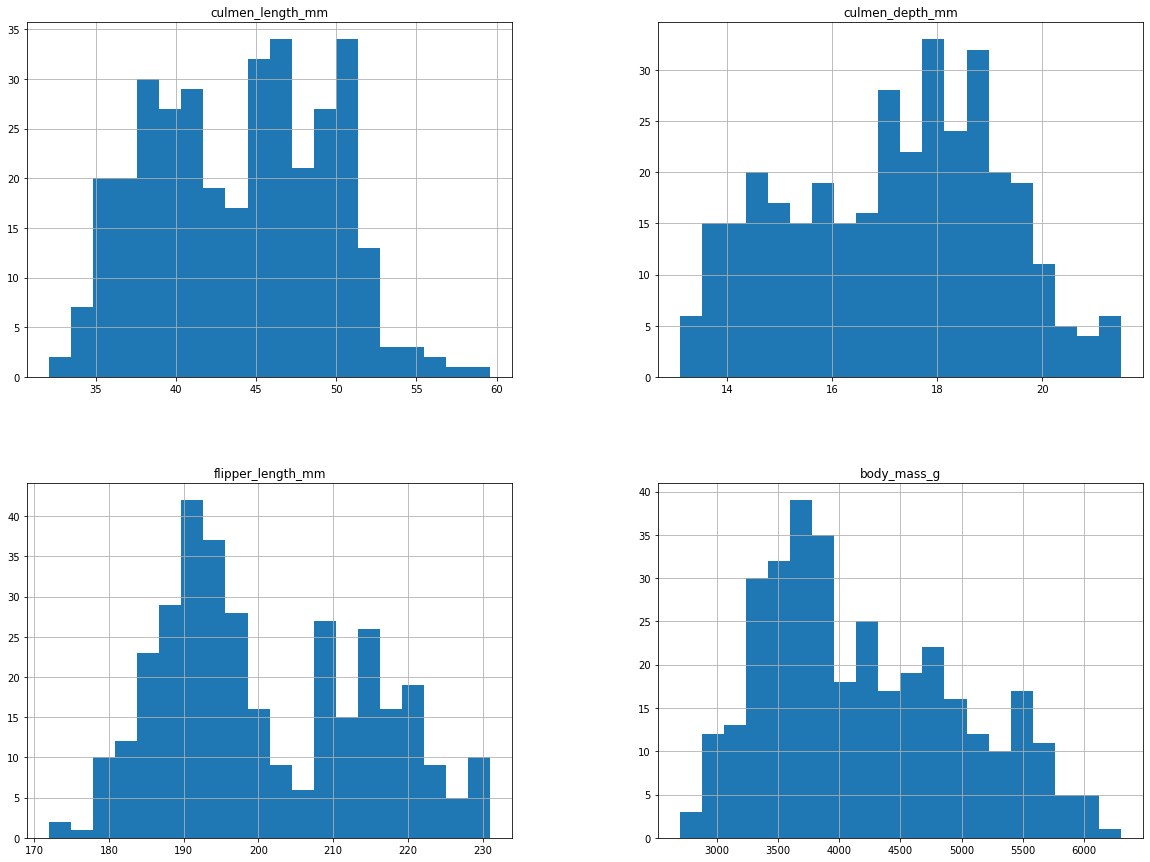

In [9]:
%matplotlib inline
import matplotlib.pyplot as plot
dataset.hist(bins=20, figsize=(20,15))

From looking at the histogram, we can see that there are not any visible outliers in our dataset. One thing we can spot however, is that for the flipper length attribute there are plenty of values in the highest bin. This can indicate, that the flipper length attribute could have some outliers in the past, but they were capped to the maximum value.

The data distribution of those attributes, based on those histograms is following:
- culment length and culmen depth distribution is symmetrical
- flipper length distribution is bimodal
- body mass distribution is right-skewed

## Correlations

During this step, we want to see the correlations between the different attributes of the dataset.
By default, our correlation method of the dataset will ignore all the non-numerical attributes.
Since our target attribute is a categorical attribute, we won't be able to see the correlation between the label and all the features.

There are different techniques to measure the correlation between the categorical attributes and other categorical or numerical attributes, however this is beyond the scope of the project and it is not really important for our case. Since our dataset have already small amount of features, we won't drop any of them since this would highly reduce the accuracy of the model. 

What would make sense and could possibly improve the accuracy of our model would be combining some of the categorical attributes with the numerical attributes - for example gender with body mass. This task however, also goes beyond the scope of this project so I will skip this step.

In [10]:
dataset.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


There is a high positive correlation between the culmen length and both flipper length (0.65) and body mass (0.59), that indicates that penguins with the longer flippers tend to weight more and also have the longer culmen. There is even higher positive correlation between the flipper length and body mass (0.87), that shows a high tendency for penguins with long flippers to weight more, which makes perfect sense.

Culmen depth however, has the negative correlations with all the other features - culmen length (-0.23), body mass (-0.47) and flipper length (-0.58). This means that penguins with shallow culmen tend to also have the smaller culmen, smaller flippers and they weight less as well.

# Data Preparation

## Data Cleaning

First thing that we will have to do during the data preparation step is to clean our data from the null values.
We will first display all the rows that have at least 1 null value for some of the attributes, in order to decide on which cleaning method we are going to use. 

Usually the best approach is to replace the null values with some default values, especially considering the small size of this dataset, but since we could already see a 1 row with almost all the features being null it will make more sense to discard this row and all the similar rows.

In [11]:
dataset[dataset.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


We can see that we have 2 rows in the dataset with almost all features set to null - row 3 and row 339.

In [12]:
dataset = dataset.drop(labels=[3, 339], axis=0)
dataset[dataset.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


We can see that rows 3 and 339 have been removed from the dataset. All the other rows with null values have only 'sex' attribute set to null, so we will replace those null values with most frequent value.

Before we do this however, we have to remember that during the data analysis we found a single row that had an invalid '.' value for the 'sex' attribute. We could handle this row separately, but it is a probably good idea to set a value of 'sex' attribute to null instead for all the rows that have '.' value, and then let the SimpleImputer handle these rows along with other rows that have missing values.

In [13]:
dataset.loc[dataset['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
dataset["sex"].replace({".": np.NaN}, inplace=True)
dataset.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                     NaN
Name: 336, dtype: object

We can see that the only row that had the '.' value for the 'sex' attribute, got it replaced with the NaN value instead, that will be handled by SimpleImputer during the next step.

In [15]:
from sklearn.impute import SimpleImputer
column_names = list(dataset)
imputer = SimpleImputer(strategy="most_frequent")
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=column_names)
dataset.iloc[[8,9,10,11,47,246,286,324, 336], :]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,MALE
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,MALE
10,Adelie,Torgersen,37.8,17.3,180.0,3700.0,MALE
11,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
47,Adelie,Dream,36.0,17.9,190.0,3450.0,FEMALE
246,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,MALE
286,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,MALE
324,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE
336,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE


After imputing all the missing values for the 'sex' feature, we can see that for 7 rows the null value was replaced with 'MALE' value and for 2 rows with 'FEMALE' value. Even though 'MALE' is the most frequent value for 'sex' feature, 2 rows still got 'FEMALE' value imputed - this could indicate that SimpleImputer has some guarding against assiging the most frequent value to the rows where this value would not make sense. 

We can notice that those 2 rows that got 'FEMALE' value imputed has also the smallest body mass from all the transformed rows, what adds more sense to why SimpleImputer made such a decision. This is also another indication, that letting SimpleImputer handle the '.' value by replacing it with NaN beforehand was probably a good idea.

In [16]:
dataset[dataset.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


We can see that all missing values in our dataset have been handled properly, so we can proceed to the next step - Feature Scaling.

## Feature Scaling

# Training

# Evaluation

# Prediction